In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rs3.seq import predict_seq
import matplotlib
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')

In [14]:
figure3_outpath = '../../Figures/Figure 3/'

In [15]:
file_path = '../../Data/cleanedData/'
NewDatasetCombine = pd.read_csv(file_path + 'CombinedCleanedDatasets.csv', low_memory=False)
NewDatasetCombine

,Target Gene Symbol,chromosome,sgRNA Sequence,sgRNA Context Sequence,sgRNA 'Cut' Position,Strand of Target,Strand of sgRNA,TSS Position,sgRNA 'Cut' Site TSS Offset,Phenotype scores-ave_Rep1_Rep2,...,condition,Domain,DataSet,zscoreRelativeNC_signed,Avg_LFC_signed,z_scored_avg_lfc,rs3ChenSeqScore,cellDomainDataSet,z_score,signed_zscore
0,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,A549,Kox1,InHouse,NaN,NaN,-0.398339,0.013999,A549_Kox1_InHouse,-0.398339,0.398339
1,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,A549,Zim3,InHouse,NaN,NaN,-0.841793,0.013999,A549_Zim3_InHouse,-0.841793,0.841793
2,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,HCT116,Zim3,InHouse,NaN,NaN,-0.992358,0.013999,HCT116_Zim3_InHouse,-0.992358,0.992358
3,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,A549,Kox1,InHouse,NaN,NaN,0.044728,-0.401549,A549_Kox1_InHouse,0.044728,-0.044728
4,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,A549,Zim3,InHouse,NaN,NaN,-0.190308,-0.401549,A549_Zim3_InHouse,-0.190308,0.190308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257411,WDR11,chr10,gctaggacctctactacaatgaa,GGCTAGGACCTCTACTACAATGAATGGGAG,120855890.0,+,+,120851363.0,4527.0,NaN,...,K562,Kox1,Gilbert,0.387317,0.354061,NaN,0.382810,K562_Kox1_Gilbert,0.387317,0.387317
257412,WDR11,chr10,gctaggacctctactacaatgaat,GCTAGGACCTCTACTACAATGAATGGGAGA,120855891.0,+,+,120851363.0,4528.0,NaN,...,K562,Kox1,Gilbert,-0.782858,-0.048063,NaN,0.654478,K562_Kox1_Gilbert,-0.782858,-0.782858
257413,WDR11,chr10,gtctttcatcaagtctgatgta,CAGTCTTTCATCAAGTCTGATGTAAGGTAT,120855971.0,+,+,120851363.0,4608.0,NaN,...,K562,Kox1,Gilbert,1.429277,0.712125,NaN,0.076554,K562_Kox1_Gilbert,1.429277,1.429277
257414,WDR11,chr10,gtaggtccaagtttcagtc,TTTATGTAGGTCCAAGTTTCAGTCTGGTAT,120856094.0,+,+,120851363.0,4731.0,NaN,...,K562,Kox1,Gilbert,0.553328,0.411110,NaN,0.717680,K562_Kox1_Gilbert,0.553328,0.553328


In [16]:
NewDatasetCombine.DataSet.value_counts()

InHouse    170332
Nunez       68575
Gilbert     18509
Name: DataSet, dtype: int64

In [17]:
#calculate within-gene spearman correlation between RS3 sequence score and z-score
withinGeneCorr = NewDatasetCombine.groupby(['cellDomainDataSet',
                                            'Target Gene Symbol'])[['signed_zscore','rs3ChenSeqScore']].corr('spearman').unstack().iloc[:, 1].reset_index()
withinGeneCorr.head()

,cellDomainDataSet,Target Gene Symbol,signed_zscore
,,,rs3ChenSeqScore
0,A549_Kox1_InHouse,AATF,0.172164
1,A549_Kox1_InHouse,ALG14,-0.112408
2,A549_Kox1_InHouse,ANAPC4,0.282955
3,A549_Kox1_InHouse,ARGLU1,0.051473
4,A549_Kox1_InHouse,ATIC,0.174143


In [18]:
withinGeneCorr.columns = ['cellDomainDataSet', 'Target Gene Symbol', 'spearman correlation']

In [19]:
withinGeneCorr.cellDomainDataSet.value_counts()

K562_Kox1_Nunez        336
A549_Kox1_InHouse      144
A549_Zim3_InHouse      144
HCT116_Kox1_InHouse    144
HCT116_Zim3_InHouse    144
K562_Kox1_Gilbert       36
Name: cellDomainDataSet, dtype: int64

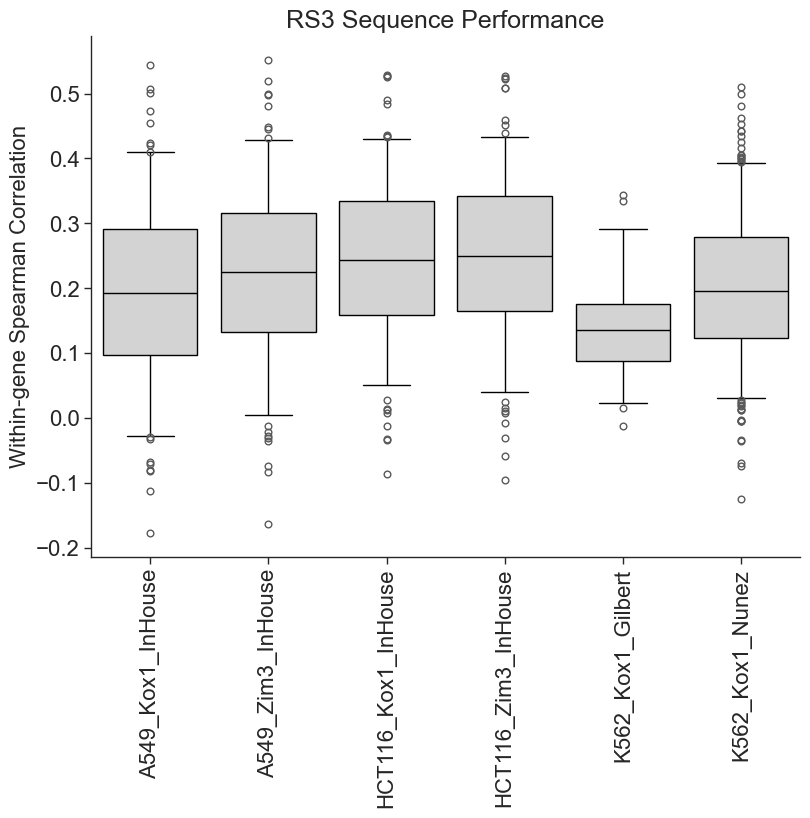

In [20]:
#plot distribution of within-gene spearman correlations in each of the 6 datasets
plt.figure(figsize=(8, 6))
sns.boxplot(x='cellDomainDataSet', y='spearman correlation', 
            data=withinGeneCorr, boxprops=dict(facecolor='lightgrey', edgecolor='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'),
                 medianprops=dict(color='black'), whis = [5,95])
plt.title('RS3 Sequence Performance',fontsize=18)
plt.xlabel('')
plt.ylabel('Within-gene Spearman Correlation',fontsize=16)
plt.tight_layout()

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.despine()

In [21]:
#average z-scores across in-house datasets since we previously saw high correlation between them
InhouseEss = NewDatasetCombine[NewDatasetCombine['DataSet'] == 'InHouse']
other = NewDatasetCombine[NewDatasetCombine['DataSet'] != 'InHouse']
InhouseEssAvg = InhouseEss.groupby(['sgRNA Context Sequence','rs3ChenSeqScore','Target Gene Symbol']).agg(signed_zscore = ('signed_zscore','mean'),
                                                                                                          num_datasets = ('cellDomainDataSet','nunique')).reset_index()
InhouseEssAvg = InhouseEssAvg[InhouseEssAvg['num_datasets'] == 4]
InhouseEssAvg['cellDomainDataSet'] = 'This Study'

#repeat within-gene spearman correlation with averaged in-house data
newData = pd.concat([InhouseEssAvg,other])
withinGeneCorr = newData.groupby(['cellDomainDataSet','Target Gene Symbol'])[['signed_zscore', 'rs3ChenSeqScore']].corr('spearman').unstack().iloc[:, 1]
withinGeneCorr = withinGeneCorr.reset_index()
withinGeneCorr.columns = ['cellDomainDataSet', 'Target Gene Symbol', 'spearman correlation']

#recreate DataSet column to use for plotting
withinGeneCorr['DataSet'] = np.where(withinGeneCorr['cellDomainDataSet'] == 'This Study',
                                     'This Study', withinGeneCorr['cellDomainDataSet'].str.split('_',expand=True)[2])
withinGeneCorr

,cellDomainDataSet,Target Gene Symbol,spearman correlation,DataSet
0,K562_Kox1_Gilbert,ARF1,0.097696,Gilbert
1,K562_Kox1_Gilbert,ARL1,0.164920,Gilbert
2,K562_Kox1_Gilbert,CARM1,0.079700,Gilbert
3,K562_Kox1_Gilbert,COG1,0.023152,Gilbert
4,K562_Kox1_Gilbert,COG3,0.233169,Gilbert
...,...,...,...,...
511,This Study,WEE1,0.301929,This Study
512,This Study,YAE1,0.160704,This Study
513,This Study,YEATS4,0.095371,This Study
514,This Study,YY1,0.266455,This Study


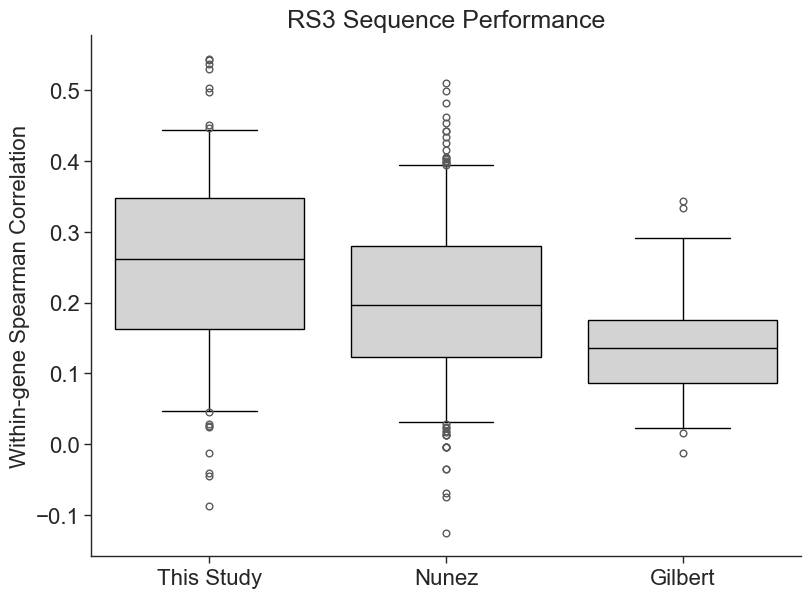

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DataSet', y='spearman correlation', 
            data=withinGeneCorr, boxprops=dict(facecolor='lightgrey', edgecolor='black'),
                 whiskerprops=dict(color='black'),  # Whisker line color
                 capprops=dict(color='black'),  # Cap line color
                 medianprops=dict(color='black'), whis = [5,95], order = ['This Study', 'Nunez', 'Gilbert'])
plt.title('RS3 Sequence Performance',fontsize=18)
plt.xlabel('')
plt.ylabel('Within-gene Spearman Correlation',fontsize=16)
plt.tight_layout()

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()

gpp.savefig(figure3_outpath + "RS3seq_within_gene_spearmanr_boxplots_inhouse_averaged.pdf", dpi=300, bbox_inches='tight')

In [23]:
medians = withinGeneCorr.groupby('DataSet')['spearman correlation'].median()
print(medians)

DataSet
Gilbert       0.135285
Nunez         0.196189
This Study    0.262079
Name: spearman correlation, dtype: float64
